In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif_

from category_encoders.binary import BinaryEncoder

from sklearn.feature_selection import SelectPercentile, RFE, SelectKBest
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, PolynomialFeatures
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier, LinearRegression, LassoCV, Ridge, ElasticNet
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

from imblearn.pipeline import Pipeline
import pingouin as pg

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix,mean_squared_error, accuracy_score, recall_score, f1_score, plot_confusion_matrix, precision_score,roc_auc_score

In [48]:
kypho = pd.read_csv("kyphosis.csv")
kypho

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [49]:
kypho.isna().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [50]:
kypho.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [51]:
kypho.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [69]:
X = kypho.drop(['Kyphosis'], axis=1)
y = np.where(kypho['Kyphosis']=='absent',0,1)

In [70]:
X.shape

(81, 3)

In [65]:
y.shape

(81,)

In [71]:
y_df = pd.DataFrame(y)
y_df.value_counts(normalize=True)

0    0.790123
1    0.209877
dtype: float64

In [77]:
X_train,  X_test,y_train, y_test = train_test_split(X, y, stratify=y, random_state=111)

In [78]:
y_train.shape

(60,)

In [80]:
X_test

,Age,Number,Start
28,4,3,16
15,1,3,16
8,113,2,16
45,139,3,10
57,120,5,8
69,15,5,16
67,159,4,13
22,96,3,12
80,36,4,13
25,9,5,13


/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


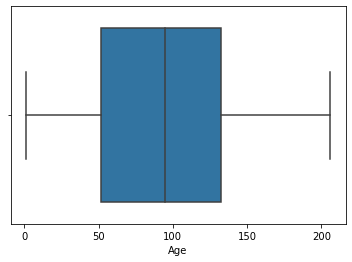

In [81]:
sns.boxplot(X_train['Age'])

/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


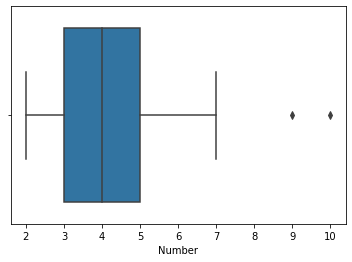

In [82]:
sns.boxplot(X_train['Number'])

/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


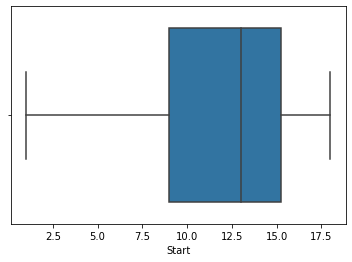

In [83]:
sns.boxplot(X_train['Start'])

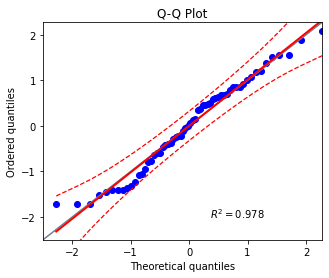

In [84]:
pg.qqplot(X_train['Age'], dist='norm')

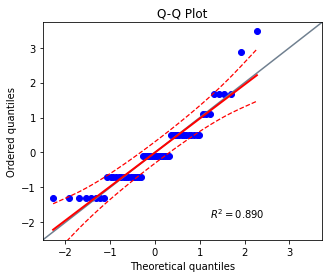

In [85]:
pg.qqplot(X_train['Number'], dist='norm')

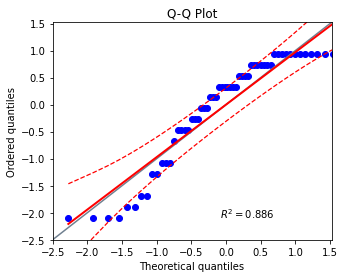

In [86]:
pg.qqplot(X_train['Start'], dist='norm')

In [87]:
# > bikin pipeline gridsearch pake under over smote

In [117]:
smt = SMOTE(random_state=42)
dtc = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier(n_neighbors = 3)
rfc = RandomForestClassifier(max_depth = 5)
xgb = XGBClassifier(verbosity = 1, max_depth = 5)

estimator = Pipeline([('smote', smt), 
                      ('scaling', StandardScaler()),
                      ('knn', knn)])
estimator.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('scaling', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [113]:
y_pred = estimator.predict(X_test)
print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84        17
           1       0.43      0.75      0.55         4

    accuracy                           0.76        21
   macro avg       0.68      0.76      0.69        21
weighted avg       0.83      0.76      0.78        21



In [110]:
estimator_dtc = Pipeline([('smote', smt),
                      ('dtc', dtc)])
estimator_dtc.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('dtc', DecisionTreeClassifier(max_depth=5))])

In [111]:
y_pred_dtc = estimator_dtc.predict(X_test)
print(classification_report( y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.50      0.50      0.50         4

    accuracy                           0.81        21
   macro avg       0.69      0.69      0.69        21
weighted avg       0.81      0.81      0.81        21



In [108]:
estimator_rfc = Pipeline([('smote', smt),
                      ('rfc', rfc)])
estimator_rfc.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('rfc', RandomForestClassifier(max_depth=5))])

In [109]:
y_pred_rfc = estimator_rfc.predict(X_test)
print(classification_report( y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        17
           1       0.50      0.75      0.60         4

    accuracy                           0.81        21
   macro avg       0.72      0.79      0.74        21
weighted avg       0.85      0.81      0.82        21



In [118]:
estimator_xgb = Pipeline([('smote', smt),
                      ('xgb', xgb)])
estimator_xgb.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=5, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=1))])

In [119]:
y_pred_xgb = estimator_xgb.predict(X_test)
print(classification_report( y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.67      0.50      0.57         4

    accuracy                           0.86        21
   macro avg       0.78      0.72      0.74        21
weighted avg       0.85      0.86      0.85        21



In [120]:
# tambahin crossval?

# mayan bgt dah 86% accuracy

In [133]:
lr = LogisticRegression()
rfc = RandomForestClassifier(max_depth=5)
knn = KNeighborsClassifier(n_neighbors = 3)

In [134]:
for clfs, clf_name in zip([lr, rfc, knn], ['Logistic Regression', 'Random Forest Classifier', 'K-Nearest Neighbors']):
    clfs.fit(X_train, y_train)
    y_pred = clfs.predict(X_test)
    print(clf_name+':')
    print(classification_report(y_test, y_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.50      0.25      0.33         4

    accuracy                           0.81        21
   macro avg       0.67      0.60      0.61        21
weighted avg       0.78      0.81      0.78        21

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.67      0.50      0.57         4

    accuracy                           0.86        21
   macro avg       0.78      0.72      0.74        21
weighted avg       0.85      0.86      0.85        21

K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.50      0.25      0.33         4

    accuracy                           0.81        21
   macro avg       0.67      0.60      0.61        21
weight

In [135]:
vc = VotingClassifier([('clf2', rfc), ('clf3', knn)], voting='soft')

In [136]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('clf2', RandomForestClassifier(max_depth=5)),
                             ('clf3', KNeighborsClassifier(n_neighbors=3))],
                 voting='soft')

In [137]:
y_pred = vc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.67      0.50      0.57         4

    accuracy                           0.86        21
   macro avg       0.78      0.72      0.74        21
weighted avg       0.85      0.86      0.85        21

